## Section1:Set Up

In [1]:
## the import department 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import sklearn as sk
from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load data and print first few lines 
# Data is only a sample data out of bigger datset
demo_df = pd.read_csv("car_data.csv")
print("Shape of just for demo data: ",demo_df.shape)
demo_df.head(10)

Shape of just for demo data:  (205, 23)


,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,9.0,111,5000,21,27,13495
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,9.0,111,5000,21,27,16500
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,10.0,102,5500,24,30,13950
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,8.0,115,5500,18,22,17450
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,ohc,five,136,mpfi,8.5,110,5500,19,25,15250
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,ohc,five,136,mpfi,8.5,110,5500,19,25,17710
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,ohc,five,136,mpfi,8.5,110,5500,19,25,18920
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,ohc,five,131,mpfi,8.3,140,5500,17,20,23875
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,ohc,five,131,mpfi,7.0,160,5500,16,22,?


In [3]:
# here body_style is a categorical variable. 
body_style = demo_df['body_style']
print("Unique elements in body_style: ", pd.unique(body_style))
body_style_dummies = pd.get_dummies(body_style)
print(body_style_dummies.head(10))

Unique elements in body_style:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
   convertible  hardtop  hatchback  sedan  wagon
0            1        0          0      0      0
1            1        0          0      0      0
2            0        0          1      0      0
3            0        0          0      1      0
4            0        0          0      1      0
5            0        0          0      1      0
6            0        0          0      1      0
7            0        0          0      0      1
8            0        0          0      1      0
9            0        0          1      0      0


Text(0, 0.5, 'Count')

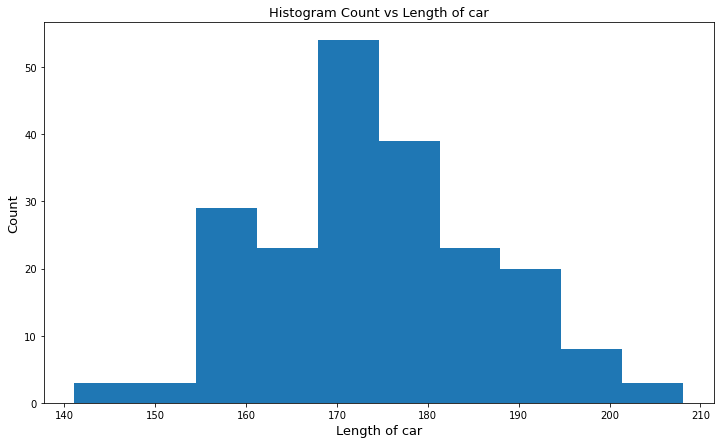

In [4]:
# in the demo dataset "Length" is a continuous variable 
length = demo_df['length']
fig = plt.figure(figsize=(12,7))
plt.hist(length) # assignment only to supress printing array output. 
plt.title("Histogram Count vs Length of car", size = 13)
plt.xlabel("Length of car", size = 13)
plt.ylabel("Count", size = 13)

## Section1: Environment Set Up 

<img src= env1.png width = "800"/>

<img src= env21.png width = "800"/>


## Section2: Housing Prices Data Set

In [5]:
## load data from train file 
int_train_df = pd.read_csv("train-2.csv")
print("Shape of training data: ", int_train_df.shape)
## first 10 elements from dataframe
int_train_df.head(10)

Shape of training data:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
## last 10 elements from dataframe
int_train_df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


After observation from above, we can say for training dataset:
1. There are `81 attributes`, out of which `SalePrice` is dependent variable. 
2. There are total `1460` data points 

In [7]:
## load data from test dataset file 
int_test_df = pd.read_csv("test_data_with_target-1.csv")
print("Shape of testing data: ", int_test_df.shape)
## first 10 elements from dataframe
int_test_df.head(10)

Shape of testing data:  (1459, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,121248.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,155260.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189430.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,193422.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,190437.0
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,176254.0
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,172914.0
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,167271.0
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,186209.0
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,125885.0


In [8]:
## last 10 elements from dataframe
int_test_df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1449,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,78259.0
1450,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,77497.0
1451,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,155198.0
1452,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,81499.0
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,73087.0
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,80538.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,80674.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,167285.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,111646.0
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,213741.0


After observation from above, we can say for testing dataset:
1. There are `81 attributes`, out of which `SalePrice` is dependent variable and will be used only for verifying predication. 
2. There are total `1459` data points 

## Preprocessing

In [9]:
train_df = pd.read_csv("train-2.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### This is about Continuous Variable here

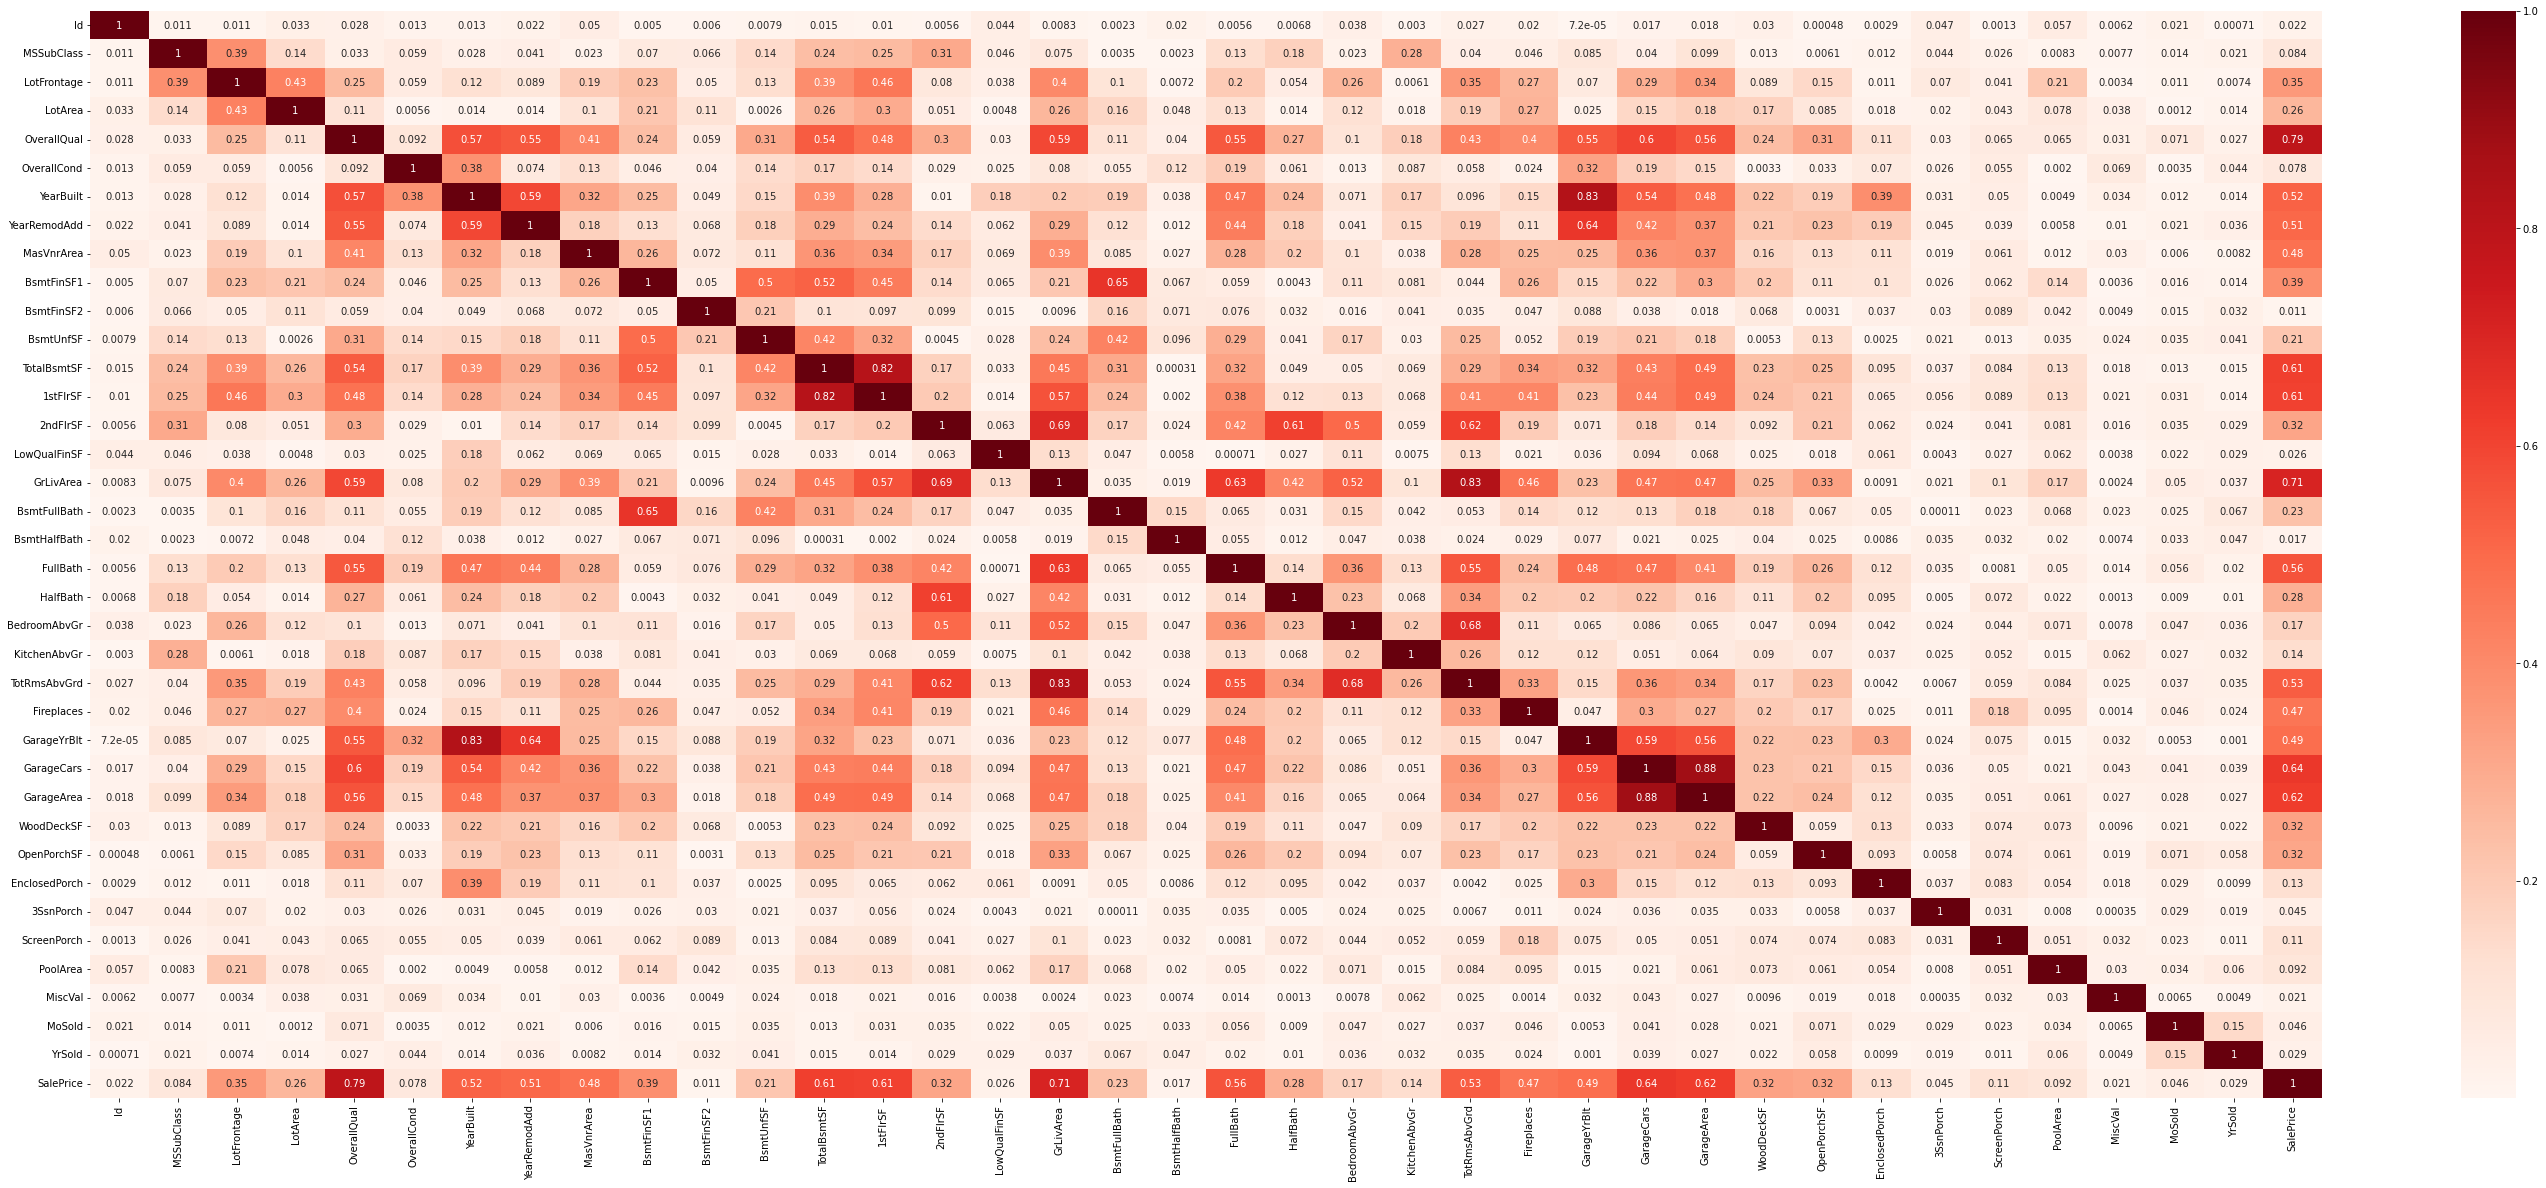

In [10]:
### get correlation matrix 
plt.figure(figsize=(50,20))
cor = abs(train_df.corr()) #taken abs value for ease of comprehensibility, 
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
var_corr = cor['SalePrice'][ (cor["SalePrice"] > 0.35) ]
print( var_corr )
columns_cont = var_corr.index
new_train_df_cont = train_df[columns_cont]
columns_cont.shape

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


(16,)

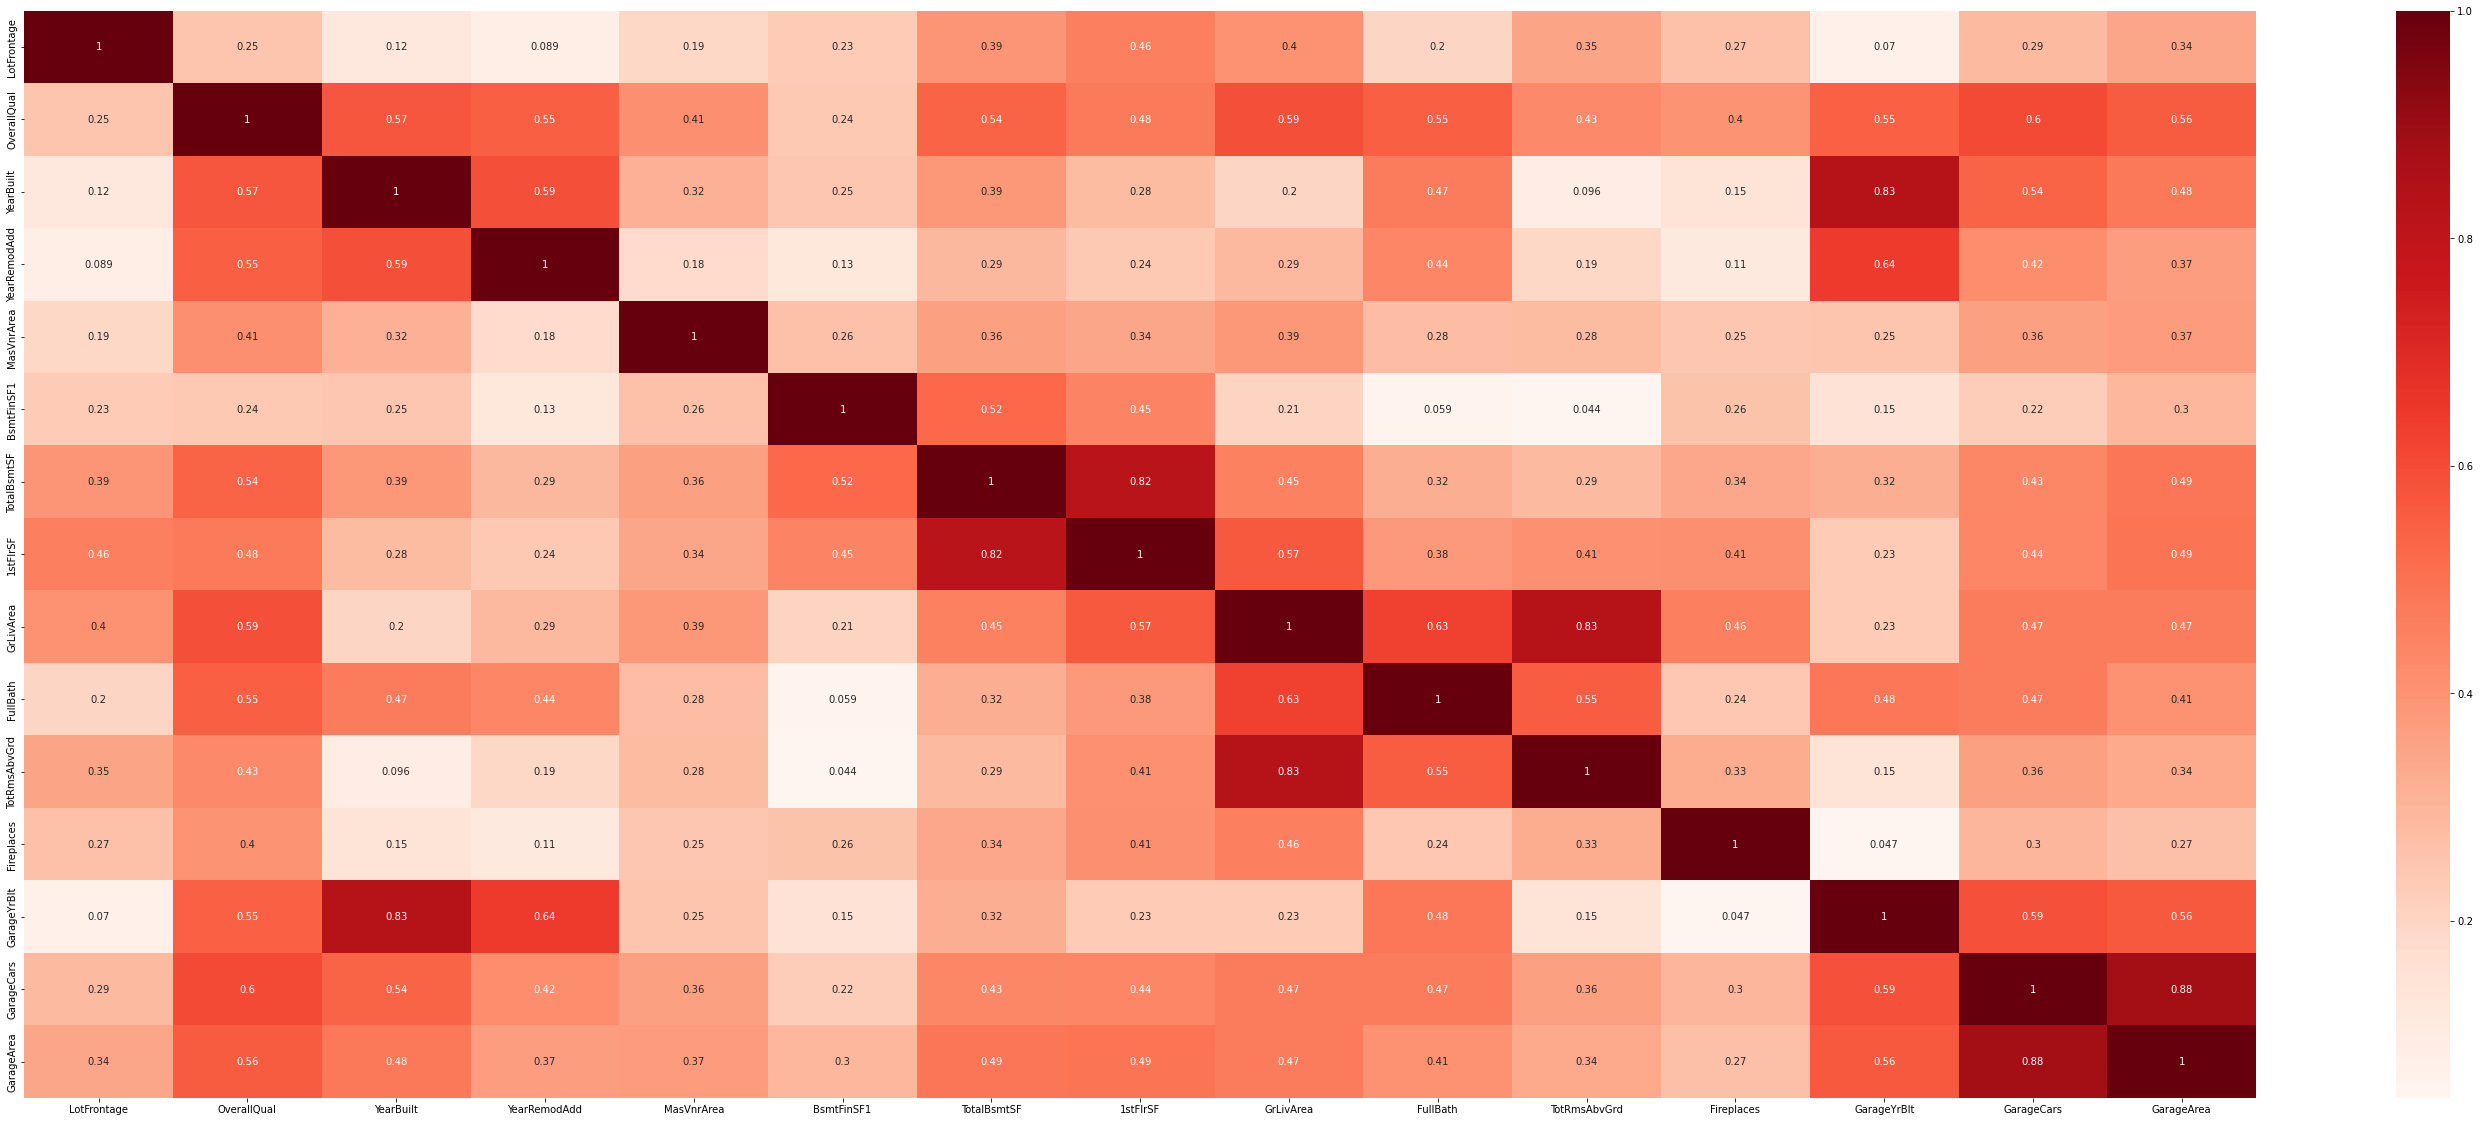

In [12]:
# Re-calculate correlation with above data. 
target_var = new_train_df_cont.pop('SalePrice') 
plt.figure(figsize=(50,20))
cor = abs(new_train_df_cont.corr()) #taken abs value for ease of comprehensibility, 
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
acorr = cor.index.tolist()
for i in range(cor.shape[0]):
    for j in range(i, cor.shape[0] ):
        if (i != j) and (cor.iloc[i,j] > 0.6):
            print("First : ",cor.index[i],":",cor.iloc[i,j],":","Second : ", cor.index[j])


First :  OverallQual : 0.6006707165907149 : Second :  GarageCars
First :  YearBuilt : 0.8256674841743408 : Second :  GarageYrBlt
First :  YearRemodAdd : 0.6422767797035356 : Second :  GarageYrBlt
First :  TotalBsmtSF : 0.8195299750050339 : Second :  1stFlrSF
First :  GrLivArea : 0.6300116462511148 : Second :  FullBath
First :  GrLivArea : 0.8254893743088425 : Second :  TotRmsAbvGrd
First :  GarageCars : 0.882475414281462 : Second :  GarageArea


In [14]:
# from above we will remove the following 
remove_these = ['GarageCars','GrLivArea','1stFlrSF','GarageYrBlt']
columns_cont = columns_cont.difference(remove_these)
columns_cont.shape ### this includes sale price

(12,)

In [15]:
cont_without_target = columns_cont.difference(['SalePrice'])
new_train_df_cont = new_train_df_cont[cont_without_target]
new_train_df_cont  

,BsmtFinSF1,Fireplaces,FullBath,GarageArea,LotFrontage,MasVnrArea,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,706,0,2,548,65.0,196.0,7,8,856,2003,2003
1,978,1,2,460,80.0,0.0,6,6,1262,1976,1976
2,486,1,2,608,68.0,162.0,7,6,920,2001,2002
3,216,1,1,642,60.0,0.0,7,7,756,1915,1970
4,655,1,2,836,84.0,350.0,8,9,1145,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,2,460,62.0,0.0,6,7,953,1999,2000
1456,790,2,2,500,85.0,119.0,6,7,1542,1978,1988
1457,275,2,2,252,66.0,0.0,7,9,1152,1941,2006
1458,49,0,1,240,68.0,0.0,5,5,1078,1950,1996


In [16]:
### Check NaN in continous variable 
new_train_df_cont.isna().sum()

BsmtFinSF1        0
Fireplaces        0
FullBath          0
GarageArea        0
LotFrontage     259
MasVnrArea        8
OverallQual       0
TotRmsAbvGrd      0
TotalBsmtSF       0
YearBuilt         0
YearRemodAdd      0
dtype: int64

In [17]:
cont_median = new_train_df_cont.median()
new_train_df_cont = new_train_df_cont.fillna(value = cont_median.iloc[0])

new_train_df_cont.isna().sum()

BsmtFinSF1      0
Fireplaces      0
FullBath        0
GarageArea      0
LotFrontage     0
MasVnrArea      0
OverallQual     0
TotRmsAbvGrd    0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

Highest GarageArea:  1114.3946613464436
Lowest GarageArea: -168.43438737384093


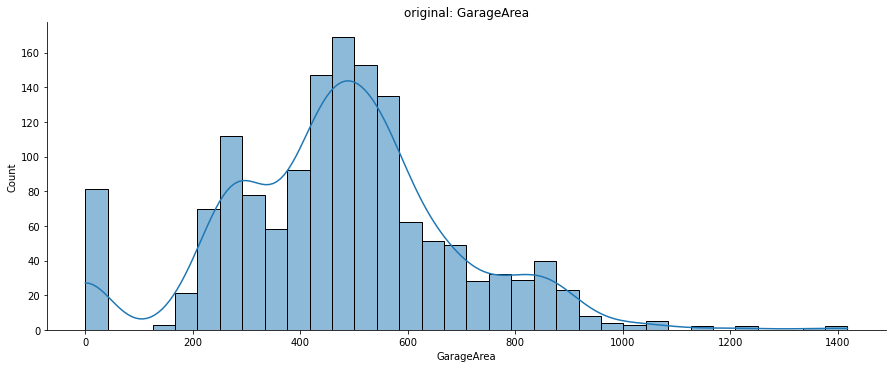

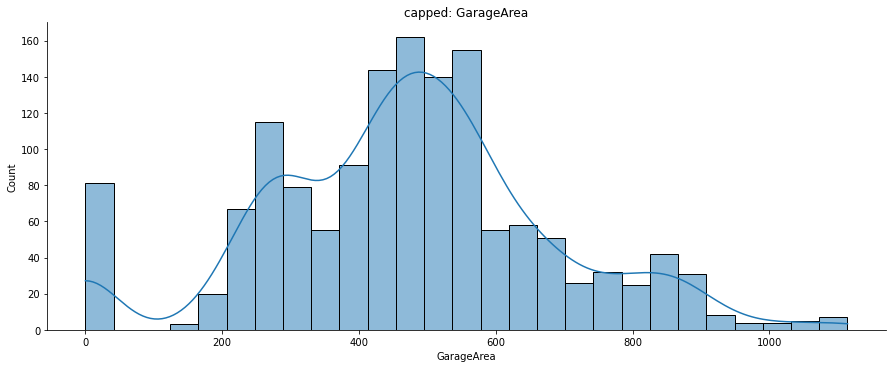

In [18]:
# outlier 
continuous_variables = cont_without_target
def getrange(var, aprint): 
    df = new_train_df_cont
    high = df[var].mean() + 3*df[var].std()
    low = df[var].mean() - 3*df[var].std()
    if aprint == 1: 
        print("Highest %s: " %var, high )
        print("Lowest %s:" %var, low)
    return high, low

train_df_norm_copy = new_train_df_cont.copy()

def capping(var, a, b):
    upper_limit = a
    lower_limit = b 
    
    df = train_df_norm_copy
    df[var] = np.where( df[var] > upper_limit, upper_limit,
            np.where( df[var]<lower_limit, lower_limit,
            df[var]
    )
)

## reference # continuous_variables 
# dataframe with normalised continuous variable : train_df_norm
def outlier(var, aprint): 
    if aprint == 1: 
        sb.displot(new_train_df_cont[var], kde = True, aspect = 2.5)
        plt.title("original: %s" %var) 
    a, b = getrange(var, aprint= aprint)
    capping(var, a, b)
    if aprint == 1:  
        sb.displot(train_df_norm_copy[var], kde = True, aspect = 2.5)
        plt.title("capped: %s" %var) 

outlier(continuous_variables[3], aprint = 1) 


In [19]:
for i in range(len(continuous_variables)): 
    if i != 3: 
        outlier(continuous_variables[3], aprint = 0) 

### Normalize Continuous variable 

In [20]:
mean_cont = new_train_df_cont.mean()
dev_cont = new_train_df_cont.std()

new_train_df_cont = (new_train_df_cont - mean_cont ) / dev_cont

## Target variable 
mean_target = target_var.mean()
dev_target = target_var.std()

target_var = (target_var - mean_target) / dev_target

### Now its time for categorical variable 

In [21]:
copy_train_df = train_df.copy()
# columns = copy_train_df.columns
# num_cols = copy_train_df._get_numeric_data().columns

new_train_df_categ = copy_train_df.select_dtypes('object')
categ_col = new_train_df_categ.columns  ## get columns 

In [22]:
## function to collect column name which has NaN greater than n
def display_NaN_Count(copy_train_df, n):
    b = copy_train_df.isna().sum()
    a = copy_train_df.isna().sum() > n 
    alist = []

    for i in range(len(a.index)):
        if a[i] == True:
            print("%s: %d" %( a.index[i], b[i] ))
            alist.append(a.index[i])
    return alist
print("Following columns have NaN more than 500:")
wah = display_NaN_Count(new_train_df_categ, 1000)

Following columns have NaN more than 500:
Alley: 1369
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [23]:
remove_these_categ = wah
print("Lenght of categ cols: ", len(categ_col) )
categ_col = categ_col.difference(remove_these_categ)
print("Lenght of categ cols: ", len(categ_col) )

Lenght of categ cols:  43
Lenght of categ cols:  39


In [24]:
new_train_df_categ = new_train_df_categ[categ_col]
new_train_df_categ.shape

(1460, 39)

In [25]:
# new_train_df_categ.isna().sum()
mode_categ = new_train_df_categ.mode()
new_train_df_categ = new_train_df_categ.fillna(value = mode_categ.iloc[0])
new_train_df_categ.isna().sum()

BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
Neighborhood     0
PavedDrive       0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

In [26]:
copy_categ_col = new_train_df_categ.columns
max_cat_each = []
for x in copy_categ_col: 
    a = new_train_df_categ[x].value_counts()
    max_cat_each.append(max(a))
    # print(a)
    # print('\n')
max_cat_each = [ (100*x)/1460 for x in max_cat_each]
categ_remove_list = []
for i in range(len(max_cat_each)): 
    if max_cat_each[i] >=60 :
        max_cat_each[i] = True
        categ_remove_list.append(copy_categ_col[i])
    else: 
        max_cat_each[i] = False

print("Length of variable to be removed: ",len(categ_remove_list))


Length of variable to be removed:  28


In [27]:
categ_col = categ_col.drop(categ_remove_list)
final_train_categ_df = pd.get_dummies(new_train_df_categ[categ_col])
for_test_categ_copy = final_train_categ_df.copy()
final_train_categ_df.shape

(1460, 96)

In [28]:
# final training dataset 
final_train_df = pd.DataFrame(index = new_train_df_cont.index)
final_train_df = final_train_df.join(new_train_df_cont)
final_train_df = final_train_df.join(final_train_categ_df)
final_train_df = final_train_df.join(target_var)

### Split train data into train and validation

In [29]:
train, valid = train_test_split(final_train_df, test_size=0.2, random_state= 45, shuffle= True)
train.shape, valid.shape

((1168, 108), (292, 108))

## Linear Regression - Training  

In [30]:
model_Linear = LinearRegression(fit_intercept= True)

In [31]:
target_train = train.pop("SalePrice")
target_valid = valid.pop("SalePrice")
model_Linear.fit(train, target_train)

LinearRegression()

### Predict - Training, Validation

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# On training data
predict_train_linear = model_Linear.predict(train)
loss_rmse_train = np.sqrt(mean_squared_error(predict_train_linear, target_train, squared= True))
print("RMSE training: %.4f" %loss_rmse_train)
r2_score_linear = r2_score(predict_train_linear, target_train)
print("RSquared training: %.4f" %r2_score_linear)

predict_valid_linear = model_Linear.predict(valid)
loss_rmse_valid = np.sqrt(mean_squared_error(predict_valid_linear, target_valid ,squared = True))
print("RMSE validation: %.4f" %loss_rmse_valid)
r2_score_linear_valid = r2_score(predict_valid_linear, target_valid)
print("RSquared validation: %.4f" %r2_score_linear_valid)


RMSE training: 0.3934
RSquared training: 0.8153
RMSE validation: 0.4198
RSquared validation: 0.8006


From above, data we can clearly observe that RMSE for validation is very high in comparison to RMSE for training. 

In following cells, I have tried to implement ridge and Lasso with grid search to address the scenarios. 

In [33]:
model_Linear.coef_

array([ 1.51347865e-02,  8.50310278e-02,  8.66062943e-02,  1.02031246e-01,
        1.32604418e-02,  6.97880036e-02,  2.29652884e-01,  1.44296246e-01,
        6.57915557e-02, -4.94988134e-02,  5.48608306e-02,  5.15918083e+10,
        5.15918083e+10,  5.15918083e+10,  5.15918083e+10,  5.15918083e+10,
        5.15918083e+10, -4.08210638e+10, -4.08210638e+10, -4.08210638e+10,
       -4.08210638e+10,  8.72399556e+08,  8.72399556e+08,  8.72399556e+08,
        8.72399556e+08,  2.40006717e+09,  8.72399556e+08,  8.72399556e+08,
        8.72399555e+08,  8.72399556e+08,  8.72399556e+08,  8.72399556e+08,
        8.72399556e+08,  8.72399556e+08,  8.72399556e+08,  8.72399556e+08,
       -5.15923879e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
       -6.68690640e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
       -5.15923879e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
       -5.15923879e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
        3.23768535e+09,  

In [34]:
a = train.columns
b = model_Linear.coef_
alist = []
for i in range(len(a)):
    if abs(b[i]) > 1e+5:
        alist.append(a[i])
print("Number of cooefficient with very HIGH value: ",len(alist))

after_remove_train = train
after_remove_valid = valid

Number of cooefficient with very HIGH value:  96


In [35]:
model_Linear1 = LinearRegression(fit_intercept= True)
model_Linear1.fit(after_remove_train, target_train)

predict_train_linear1 = model_Linear1.predict(after_remove_train)
loss_rmse_train1 = np.sqrt(mean_squared_error(predict_train_linear1, target_train, squared= True))
print("RMSE Training: ",loss_rmse_train1)

predict_valid_linear1 = model_Linear1.predict(after_remove_valid)
loss_rmse_valid1 = np.sqrt(mean_squared_error(predict_valid_linear1, target_valid ,squared = True))
print("RMSE validation: ",loss_rmse_valid1)

RMSE Training:  0.393406954778025
RMSE validation:  0.41983590797477094


In [36]:
model_Linear1.coef_

array([ 1.51347865e-02,  8.50310278e-02,  8.66062943e-02,  1.02031246e-01,
        1.32604418e-02,  6.97880036e-02,  2.29652884e-01,  1.44296246e-01,
        6.57915557e-02, -4.94988134e-02,  5.48608306e-02,  5.15918083e+10,
        5.15918083e+10,  5.15918083e+10,  5.15918083e+10,  5.15918083e+10,
        5.15918083e+10, -4.08210638e+10, -4.08210638e+10, -4.08210638e+10,
       -4.08210638e+10,  8.72399556e+08,  8.72399556e+08,  8.72399556e+08,
        8.72399556e+08,  2.40006717e+09,  8.72399556e+08,  8.72399556e+08,
        8.72399555e+08,  8.72399556e+08,  8.72399556e+08,  8.72399556e+08,
        8.72399556e+08,  8.72399556e+08,  8.72399556e+08,  8.72399556e+08,
       -5.15923879e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
       -6.68690640e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
       -5.15923879e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
       -5.15923879e+09, -5.15923879e+09, -5.15923879e+09, -5.15923879e+09,
        3.23768535e+09,  

From above coefficent list, if we observe that most of the dummies of categorical variables have high value of coefficient. 

This will create highly skewed line fit. This can be seen in below diagram. To correct this, Ridge and Lasso are implemented and compared. 

Median:  3104954809.226559
Min:  -74518925551.88824
Max:  51591808326.95749
Inercept:  43601966406.636696


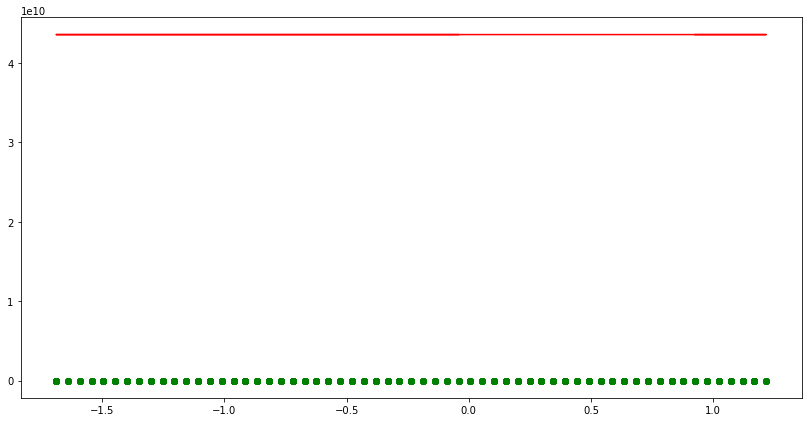

In [37]:
print('Median: ', np.median(model_Linear1.coef_))
print('Min: ', np.min(model_Linear1.coef_))
print('Max: ', np.max(model_Linear1.coef_))
n = 10
X = after_remove_train[after_remove_train.columns[n]]
M = model_Linear1.coef_
M0 = M[n]
C = model_Linear1.intercept_
print("Inercept: ",C)
#  Y = M[0]X + C
T = target_train.values
fig = plt.figure(figsize = (14,7))
plt.scatter(after_remove_train[after_remove_train.columns[n]],T, color='g')
plt.plot(X, (M0* X + C), color='r')
plt.show()

## Ridge Regression- Training Data

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model_ridge = Ridge()

In [39]:
# parameters = {'alpha': [1e-10, 1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0,1,2,3,4,5,6,7,8,9, 1e+1,1e+2,1e+3,1e+4,1e+5,1e+6,1e+7,1e+8,1e+9,1e+10]}
# adf = after_remove_valid
# hyper_parameter_tuning_ridge = adf.join(target_valid)
therange = np.arange(1, 50, 0.01) 
parameters = {'alpha': therange}
ridge_regressor = GridSearchCV(model_ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(after_remove_train, target_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 1.  ,  1.01,  1.02, ..., 49.97, 49.98, 49.99])},
             scoring='neg_mean_squared_error')

In [40]:
print("Best Parameter found in grid search is: ",ridge_regressor.best_params_['alpha'])
print("Best Score found in grid serach is: ",ridge_regressor.best_score_)

Best Parameter found in grid search is:  5.110000000000004
Best Score found in grid serach is:  -0.23260764321410526


Text(0.5, 1.0, ' Error vs Alpha')

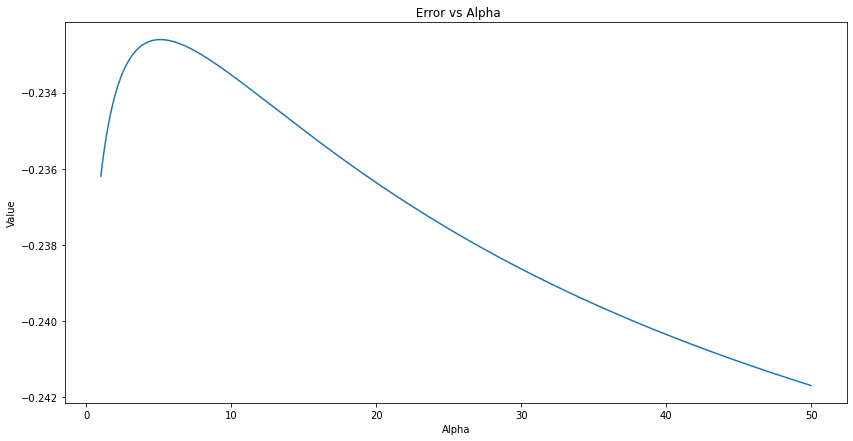

In [41]:
ridge_train_score = ridge_regressor.cv_results_['mean_test_score']
fig = plt.figure(figsize= (14,7))
plt.plot(therange, ridge_train_score)
plt.xlabel("Alpha")
plt.ylabel('Value')
plt.title(" Error vs Alpha")

In [42]:
ridge_regressor1 = Ridge(alpha=5.110)
ridge_regressor = ridge_regressor1
ridge_regressor.fit(after_remove_train, target_train)

Ridge(alpha=5.11)

In [43]:
predict_train_ridge = ridge_regressor.predict(after_remove_train)
loss_rmse_train_ridge = np.sqrt(mean_squared_error(predict_train_ridge, target_train, squared= True))
r2_score_train_ridge = r2_score(predict_train_ridge, target_train)
print("RMSE Ridge Training: %.4f" %loss_rmse_train_ridge)
print("RSquared Ridge Training: %.4f" %r2_score_train_ridge)

predict_valid_ridge = ridge_regressor.predict(after_remove_valid)
loss_rmse_valid_ridge = np.sqrt(mean_squared_error(predict_valid_ridge, target_valid, squared= True))
r2_score_valid_ridge = r2_score(predict_valid_ridge, target_valid)
print("RMSE Ridge Validation: %.4f" %loss_rmse_valid_ridge)
print("RSquared Ridge Validation: %.4f" %r2_score_valid_ridge)


RMSE Ridge Training: 0.3981
RSquared Ridge Training: 0.8059
RMSE Ridge Validation: 0.4015
RSquared Ridge Validation: 0.8107


Inercept:  0.09229115703422563


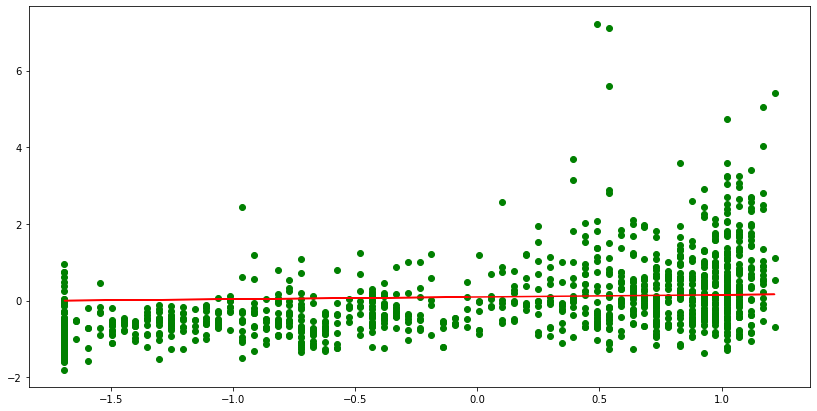

In [44]:
n = 10
X = after_remove_train[after_remove_train.columns[n]]
M = ridge_regressor.coef_
M0 = M[n]
C = ridge_regressor.intercept_
print("Inercept: ",C)
#  Y = M[0]X + C
T = target_train.values
fig = plt.figure(figsize = (14,7))
plt.scatter(after_remove_train[after_remove_train.columns[n]],T, color='g')
plt.plot(X, (M0* X + C), color='r')
plt.show()

## Lasso Regression - Training Data 

In [45]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()

Best Parameter found in grid search is:  0.003000000000001002
Best Score found in grid serach is:  -0.22799654103113448


Text(0, 0.5, 'Score')

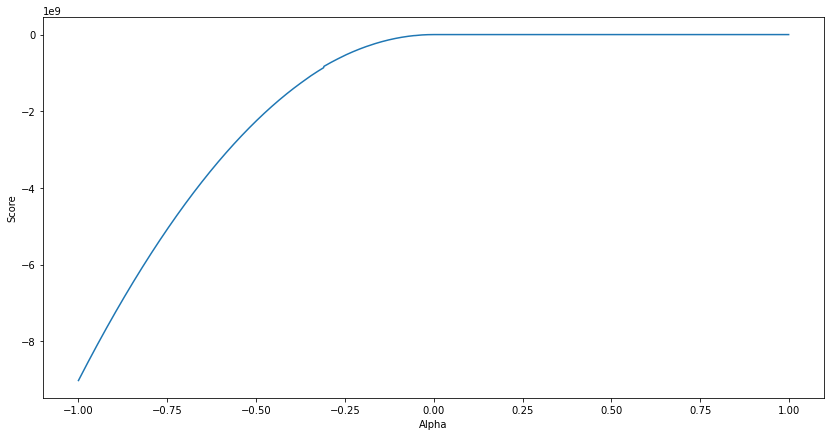

In [46]:
import warnings
warnings.filterwarnings('ignore')
therange1 = np.arange(-1, 1, 0.001) 
parameters = {'alpha': therange1}
# parameters = {'alpha': [1e-10, 1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0,1,2,3,4,5,6,7,8,9, 1e+1,1e+2,1e+3,1e+4,1e+5,1e+6,1e+7,1e+8,1e+9,1e+10]}

lasso_regressor = GridSearchCV(model_lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(after_remove_train, target_train)
print("Best Parameter found in grid search is: ",lasso_regressor.best_params_['alpha'])
print("Best Score found in grid serach is: ",lasso_regressor.best_score_)

lasso_train_score = lasso_regressor.cv_results_['mean_test_score']
fig = plt.figure(figsize= (14,7))
plt.plot(therange1, lasso_train_score)
plt.xlabel("Alpha")
plt.ylabel('Score')

In [47]:
# lasso_regressor1 = lasso_regressor.estimator
lasso_regressor1 = Lasso(alpha = 0.003000000000001002)
lasso_regressor = lasso_regressor1
lasso_regressor.fit(after_remove_train, target_train)

Lasso(alpha=0.003000000000001002)

In [48]:
predict_train_lasso = lasso_regressor.predict(after_remove_train)
loss_rmse_train_lasso = np.sqrt(mean_squared_error(predict_train_lasso, target_train, squared= True))
r2_score_train_lasso = r2_score(predict_train_lasso, target_train)
print("RMSE lasso Training: %.4f" %loss_rmse_train_lasso)
print("RSquared lasso Training: %.4f" %r2_score_train_lasso)

predict_valid_lasso = lasso_regressor.predict(after_remove_valid)
loss_rmse_valid_lasso = np.sqrt(mean_squared_error(predict_valid_lasso, target_valid, squared= True))
r2_score_valid_lasso = r2_score(predict_valid_lasso, target_valid)
print("RMSE lasso Validation: %.4f" %loss_rmse_valid_lasso)
print("RSquared lasso Validation: %.4f" %r2_score_valid_lasso)

RMSE lasso Training: 0.4121
RSquared lasso Training: 0.7867
RMSE lasso Validation: 0.3956
RSquared lasso Validation: 0.8113


Inercept:  -0.09834573186042281


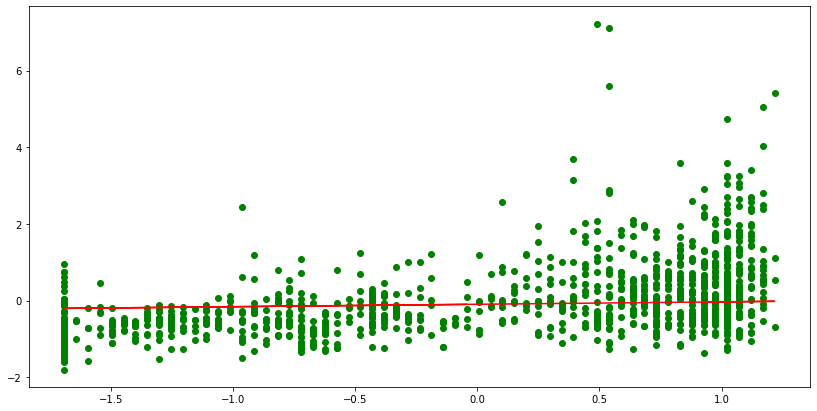

In [49]:
n = 10
X = after_remove_train[after_remove_train.columns[n]]
M = lasso_regressor.coef_
M0 = M[n]
C = lasso_regressor.intercept_
print("Inercept: ",C)
#  Y = M[0]X + C
T = target_train.values
fig = plt.figure(figsize = (14,7))
plt.scatter(after_remove_train[after_remove_train.columns[n]],T, color='g')
plt.plot(X, (M0* X + C), color='r')
plt.show()

## Now the testing data

#### Preprocessing

In [50]:
test_df = pd.read_csv('test_data_with_target-1.csv')
test_cont_df = test_df[cont_without_target]
# test_categ_col = final_train_categ_df.columns
test_categ_df = test_df[categ_col]
test_target = test_df['SalePrice']

In [51]:
test_categ_df.shape
dumm = pd.get_dummies(test_categ_df[categ_col])
diff = for_test_categ_copy.columns.difference( dumm.columns)
df = pd.DataFrame(0, index=range(test_categ_df.shape[0]), columns=diff)

In [52]:
# check for missing values in continous variables 
test_cont_df.isna().sum()

BsmtFinSF1        1
Fireplaces        0
FullBath          0
GarageArea        1
LotFrontage     227
MasVnrArea       15
OverallQual       0
TotRmsAbvGrd      0
TotalBsmtSF       1
YearBuilt         0
YearRemodAdd      0
dtype: int64

In [53]:
test_cont_median = test_cont_df.median()
test_cont_df = test_cont_df.fillna(test_cont_median.iloc[0])
test_cont_df.isna().sum()

BsmtFinSF1      0
Fireplaces      0
FullBath        0
GarageArea      0
LotFrontage     0
MasVnrArea      0
OverallQual     0
TotRmsAbvGrd    0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [54]:
# Normalize
mean_test = test_cont_df.mean()
dev_test = test_cont_df.std()

test_cont_df = (test_cont_df - mean_test)/dev_test

mean_test_tar = test_target.mean()
dev_test_tar = test_target.std()

test_target = (test_target - mean_test_tar)/dev_test_tar


In [55]:
## now the categorical variable 
test_categ_df.isna().sum()

BsmtFinType1    42
BsmtQual        44
Exterior1st      1
Exterior2nd      1
Foundation       0
GarageFinish    78
HeatingQC        0
HouseStyle       0
KitchenQual      1
MasVnrType      16
Neighborhood     0
dtype: int64

In [56]:
test_categ_mode = test_categ_df.mode()
test_categ_df = test_categ_df.fillna(test_categ_mode.iloc[0])
test_categ_df.isna().sum()

BsmtFinType1    0
BsmtQual        0
Exterior1st     0
Exterior2nd     0
Foundation      0
GarageFinish    0
HeatingQC       0
HouseStyle      0
KitchenQual     0
MasVnrType      0
Neighborhood    0
dtype: int64

In [57]:
# get dummy for categorical variable. 
final_test_categ_df = pd.get_dummies(test_categ_df[categ_col])


In [58]:
## join the data 
final_test_df = pd.DataFrame(index= test_cont_df.index)
final_test_df = final_test_df.join(test_cont_df)
final_test_df = final_test_df.join(final_test_categ_df)
final_test_df = final_test_df.join(df)
# final_test_df = final_test_df[col_train_1]
final_test_df.shape


(1459, 107)

In [59]:
predict_linear_test = model_Linear1.predict(final_test_df)
predict_ridge_test = ridge_regressor.predict(final_test_df)
predict_lasso_test = lasso_regressor.predict(final_test_df)

In [60]:
loss_rmse_test_linear = np.sqrt(mean_squared_error(predict_linear_test, test_target, squared= True))
r2_score_test_linear = r2_score(predict_linear_test, test_target)
print("RMSE Linear Testing: %.4f" %loss_rmse_test_linear )
print("RSquared Linear Testing: %.4f" %r2_score_test_linear)

loss_rmse_test_ridge = np.sqrt(mean_squared_error(predict_ridge_test, test_target, squared= True))
r2_score_test_ridge = r2_score(predict_ridge_test, test_target)
print("\nRMSE ridge Testing: %.4f" %loss_rmse_test_ridge )
print("RSquared ridge Testing: %.4f" %r2_score_test_ridge)

loss_rmse_test_lasso = np.sqrt(mean_squared_error(predict_lasso_test, test_target, squared= True))
r2_score_test_lasso = r2_score(predict_lasso_test, test_target)
print("\nRMSE lasso Testing: %.4f" %loss_rmse_test_lasso )
print("RSquared lasso Testing: %.4f" %r2_score_test_lasso)

RMSE Linear Testing: 78307832363.2734
RSquared Linear Testing: -2.2628

RMSE ridge Testing: 0.5614
RSquared ridge Testing: 0.3934

RMSE lasso Testing: 0.4490
RSquared lasso Testing: 0.6443


Index(['Neighborhood_Sawyer', 'BsmtQual_Ex', 'MasVnrType_BrkCmn',
       'Exterior1st_Stone', 'OverallQual', 'Neighborhood_MeadowV',
       'Exterior1st_BrkFace', 'Neighborhood_Gilbert', 'TotRmsAbvGrd',
       'Neighborhood_SawyerW'],
      dtype='object')

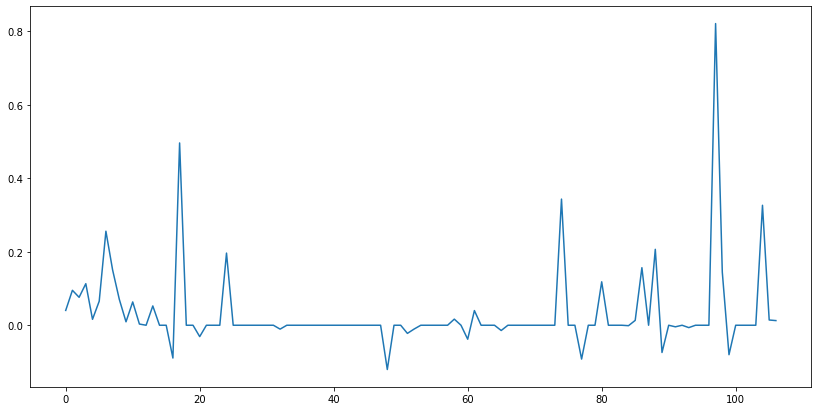

In [61]:
important_feature = []

a = lasso_regressor.coef_.tolist()
b = [abs(x) for x in a]
b.sort(reverse = True)
alista = []

# print(max(b))
for i in range(10): 
    alista.append(b[i])
    
for i in range(10):
    for j in range(len(a)): 
        if abs(a[j]) == alista[i]: 
            important_feature.append(j)
fig = plt.figure(figsize= (14,7))
plt.plot(a)
final_test_df[final_test_df.columns[important_feature]].columns


### line fitting plots are on normalized data and if it was plotted against actual data. It would look different. 